In [1]:
from google.colab import files
uploaded = files.upload()

Saving oral_cancer_prediction_dataset.csv to oral_cancer_prediction_dataset.csv


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
OC = pd.read_csv('oral_cancer_prediction_dataset.csv')
OC.head(5)

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
0,1,Ethiopia,Male,34,1,1,High,Early,Radiotherapy,0.826235,0
1,2,Turkey,Female,84,1,1,High,Moderate,Radiotherapy,0.376607,0
2,3,Turkey,Female,62,1,1,Middle,Early,Radiotherapy,0.736296,1
3,4,Tanzania,Male,48,1,1,Middle,Moderate,Combination,0.786118,0
4,5,France,Male,26,1,1,Middle,Early,Radiotherapy,0.830411,0


In [4]:
OC.tail(5)

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
160287,160288,United Kingdom,Female,53,0,1,Middle,Late,Combination,0.718270,0
160288,160289,Brazil,Female,81,0,0,Low,Early,Chemotherapy,0.765502,0
160289,160290,Nigeria,Male,59,0,1,Low,Moderate,Radiotherapy,0.349600,1
160290,160291,Philippines,Female,43,0,0,High,Moderate,Chemotherapy,0.727410,1
160291,160292,Nigeria,Female,20,0,0,Low,Early,Surgery,0.741093,1


In [5]:
OC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   Country               160292 non-null  object 
 2   Gender                160292 non-null  object 
 3   Age                   160292 non-null  int64  
 4   Tobacco_Use           160292 non-null  int64  
 5   Alcohol_Use           160292 non-null  int64  
 6   Socioeconomic_Status  160292 non-null  object 
 7   Diagnosis_Stage       160292 non-null  object 
 8   Treatment_Type        160292 non-null  object 
 9   Survival_Rate         160292 non-null  float64
 10  HPV_Related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.5+ MB


In [20]:
OC.size

1763212

In [6]:
OC.describe()

,ID,Age,Tobacco_Use,Alcohol_Use,Survival_Rate,HPV_Related
count,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,80146.500000,46.564102,0.601677,0.499638,0.599990,0.298543
std,46272.459012,20.594431,0.489554,0.500001,0.172882,0.457620
min,1.000000,20.000000,0.000000,0.000000,0.300002,0.000000
25%,40073.750000,29.000000,0.000000,0.000000,0.450680,0.000000
50%,80146.500000,39.000000,1.000000,0.000000,0.599586,0.000000
75%,120219.250000,64.000000,1.000000,1.000000,0.749291,1.000000
max,160292.000000,89.000000,1.000000,1.000000,0.899992,1.000000


In [7]:
OC.isnull().sum()

,0
ID,0
Country,0
Gender,0
Age,0
Tobacco_Use,0
Alcohol_Use,0
Socioeconomic_Status,0
Diagnosis_Stage,0
Treatment_Type,0
Survival_Rate,0


<ipython-input-8-fc3c95fbe847>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=OC, palette='pastel')


<Axes: xlabel='Gender', ylabel='count'>

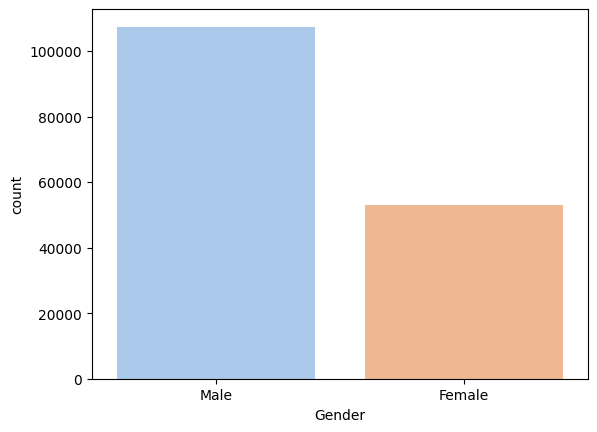

In [8]:
# Ploting difference between male and female
sns.countplot(x='Gender', data=OC, palette='pastel')

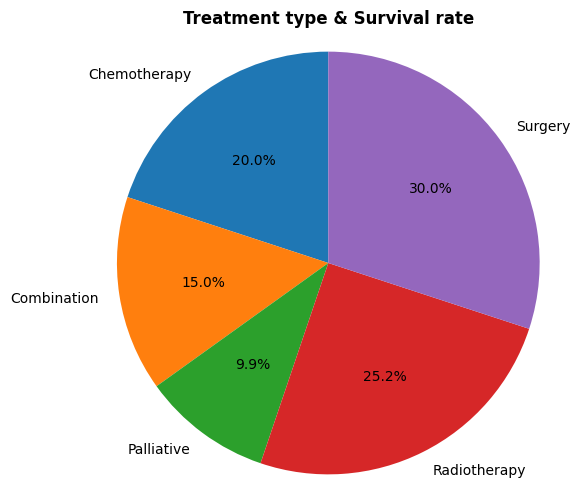

In [9]:
# Grouped data
grouped_data = OC.groupby('Treatment_Type')['Survival_Rate'].sum()
labels = grouped_data.index
values = grouped_data.values
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Treatment type & Survival rate', weight="bold")

# Display the chart
plt.show()

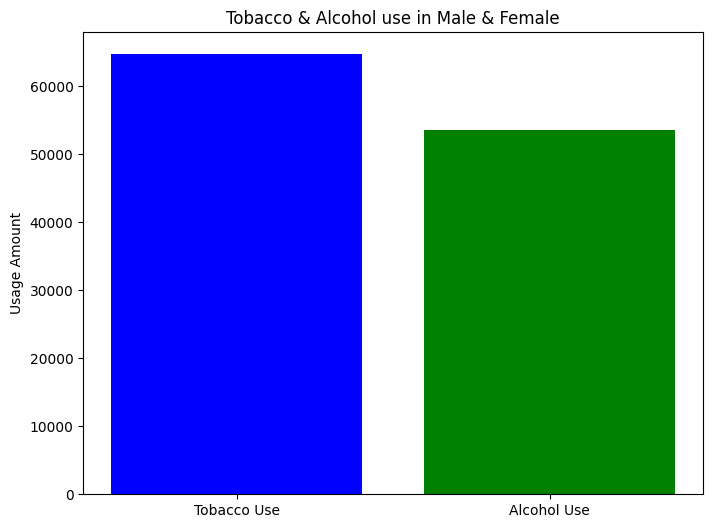

In [10]:
# Tobacco & Alcohol use in Male & Female
male_data = OC[OC['Gender'] == 'Male']
tobacco_use = male_data['Tobacco_Use'].sum()
alcohol_use = male_data['Alcohol_Use'].sum()
categories = ['Tobacco Use', 'Alcohol Use']
values = [tobacco_use, alcohol_use]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'green'])
plt.title('Tobacco & Alcohol use in Male & Female')
plt.ylabel('Usage Amount')
plt.show()

In [11]:
# Compare Tobacco & Alcohol use in Gender group
male_data = OC[OC['Gender'] == 'Male']
female_data = OC[OC['Gender'] == 'Female']

In [12]:
# Adding male data and fe,ale data
tobacco_use_male = male_data['Tobacco_Use'].sum()
alcohol_use_male = male_data['Alcohol_Use'].sum()

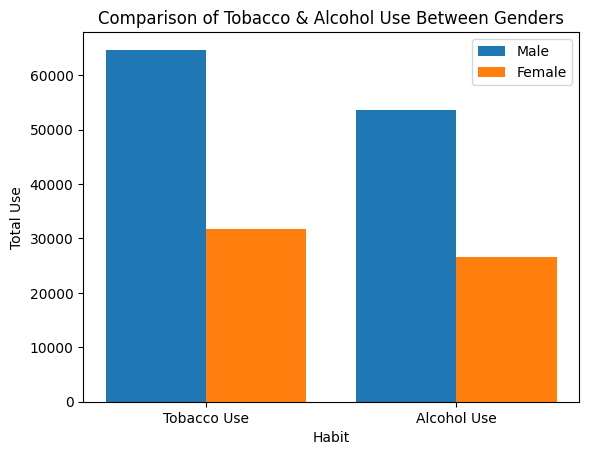

In [13]:
# Compare Tobacco & Alcohol use in Gender group
male_data = OC[OC['Gender'] == 'Male']
female_data = OC[OC['Gender'] == 'Female']
# Adding male data and fe,ale data
tobacco_use_male = male_data['Tobacco_Use'].sum()
alcohol_use_male = male_data['Alcohol_Use'].sum()
tobacco_use_female = female_data['Tobacco_Use'].sum()
alcohol_use_female = female_data['Alcohol_Use'].sum()

# Creating the plot
X = ['Tobacco Use', 'Alcohol Use']
male_values = [tobacco_use_male, alcohol_use_male]
female_values = [tobacco_use_female, alcohol_use_female]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_values, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_values, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.xlabel("Habit")
plt.ylabel("Total Use")
plt.title("Comparison of Tobacco & Alcohol Use Between Genders")
plt.legend()
plt.show()


In [14]:
# Stages of Patients Diagnosis
diagnosis_counts = OC['Diagnosis_Stage'].value_counts()
diagnosis_counts

,count
Diagnosis_Stage,
Moderate,63939
Early,48287
Late,48066


<ipython-input-15-73cfe9ff3acd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis_Stage', data=OC, palette='viridis')


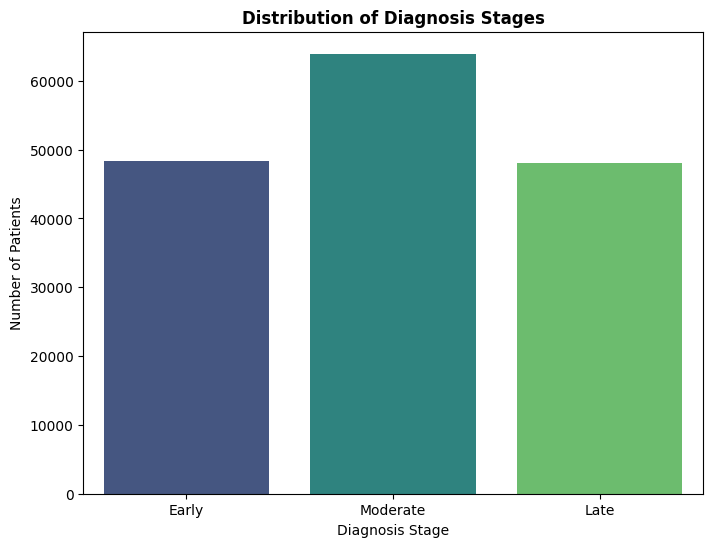

In [15]:
# Plotting the stages of patients' diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis_Stage', data=OC, palette='viridis')
plt.title('Distribution of Diagnosis Stages', weight='bold')
plt.xlabel('Diagnosis Stage')
plt.ylabel('Number of Patients')
plt.show()


Text(0.5, 0, 'Age')

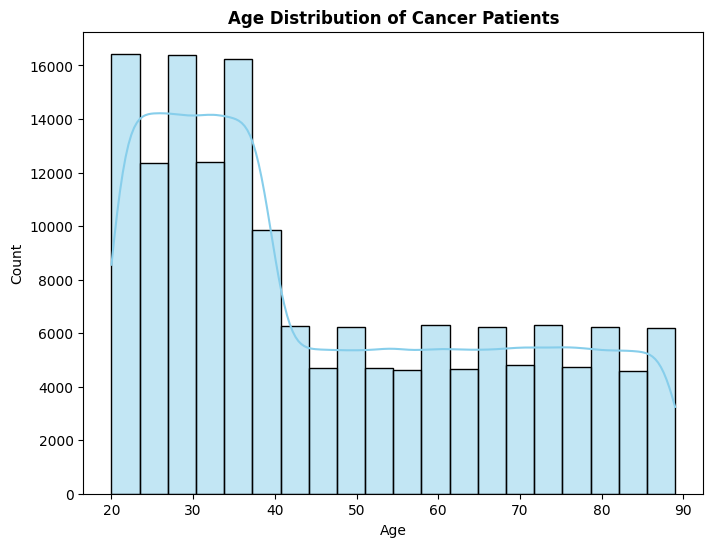

In [16]:
# Age Distribution of cancer patient
plt.figure(figsize=(8, 6))
sns.histplot(OC['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Cancer Patients', weight='bold')
plt.xlabel('Age')

<ipython-input-17-fa4de4a214b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Socioeconomic_Status", y="Survival_Rate", data=OC, palette="husl")


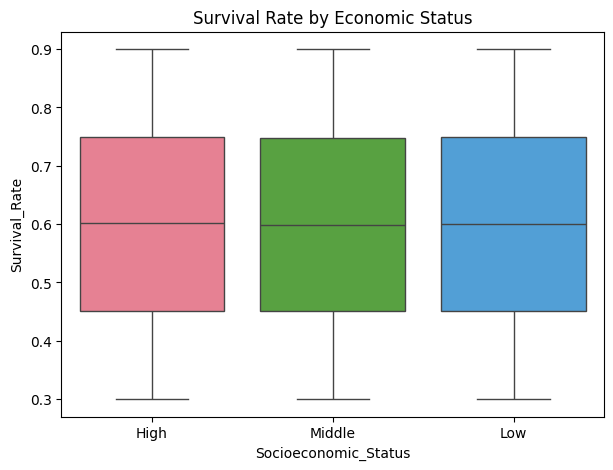

In [17]:
# Survival Rate by Economic status
plt.figure(figsize=(7, 5))
sns.boxplot(x="Socioeconomic_Status", y="Survival_Rate", data=OC, palette="husl")
plt.title("Survival Rate by Economic Status")
plt.show()

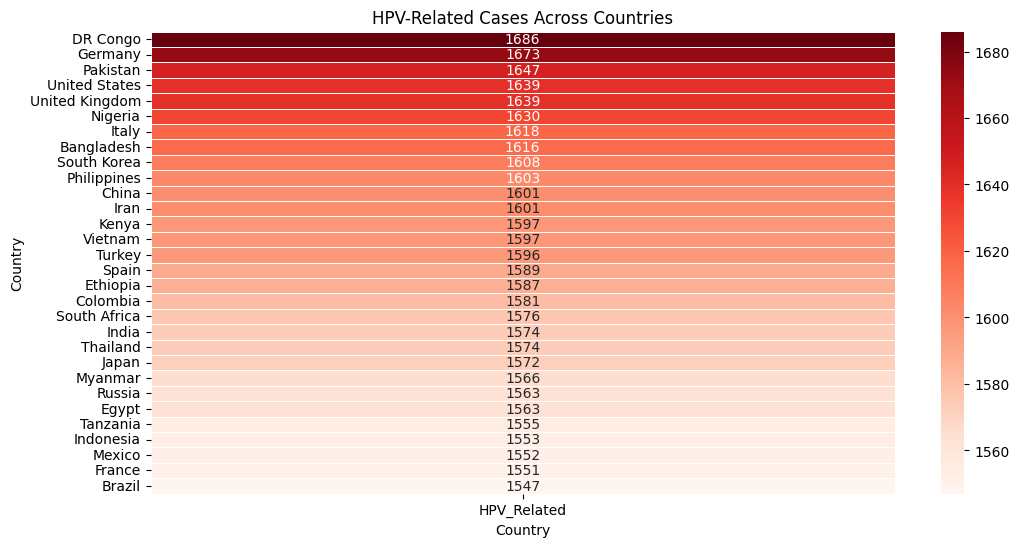

In [18]:
plt.figure(figsize=(12, 6))
hpv_counts = OC.groupby("Country")["HPV_Related"].sum().reset_index()
hpv_counts = hpv_counts.sort_values(by="HPV_Related", ascending=False)
sns.heatmap(hpv_counts.set_index("Country"), annot=True, cmap="Reds", linewidths=0.5, fmt=".0f")
plt.title("HPV-Related Cases Across Countries")
plt.xlabel("Country")
plt.show()

In [32]:
X = OC.drop(columns=["Country", "Socioeconomic_Status", "Diagnosis_Stage", "Treatment_Type", "HPV_Related"])  # Features
y = OC["HPV_Related"]  # Target variable


In [41]:
# Create a mapping dictionary
gender_mapping = {'Male': 0, 'Female': 1}

# Use the map function to convert the 'Gender' column
OC['Gender'] = OC['Gender'].map(gender_mapping)

In [44]:
X = OC.drop(columns=["Country", "Socioeconomic_Status", "Diagnosis_Stage", "Treatment_Type", "HPV_Related"])  # Features
y = OC["HPV_Related"]  # Target variable

In [53]:
# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [54]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [55]:
# Split into Train and Test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [56]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [57]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.7007392619857138
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     22465
           1       0.00      0.00      0.00      9594

    accuracy                           0.70     32059
   macro avg       0.35      0.50      0.41     32059
weighted avg       0.49      0.70      0.58     32059



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Model Performance:
Accuracy: 0.5710408933528807
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     22465
           1       0.29      0.30      0.30      9594

    accuracy                           0.57     32059
   macro avg       0.49      0.49      0.49     32059
weighted avg       0.58      0.57      0.57     32059


Random Forest Model Performance:
Accuracy: 0.656913815153311
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     22465
           1       0.30      0.11      0.16      9594

    accuracy                           0.66     32059
   macro avg       0.50      0.50      0.47     32059
weighted avg       0.58      0.66      0.60     32059


SVM Model Performance:
Accuracy: 0.7007392619857138
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     22465
           1       0.00      0.00      0.00      9594

    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gradient Boosting Model Performance:
Accuracy: 0.7003961446083783
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     22465
           1       0.13      0.00      0.00      9594

    accuracy                           0.70     32059
   macro avg       0.42      0.50      0.41     32059
weighted avg       0.53      0.70      0.58     32059



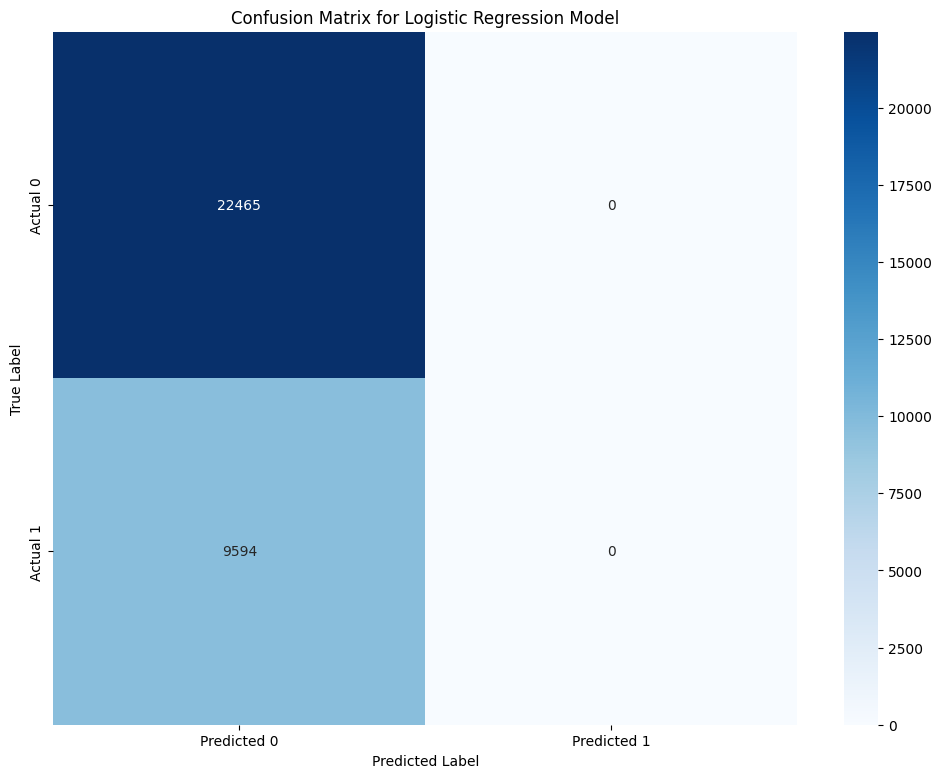

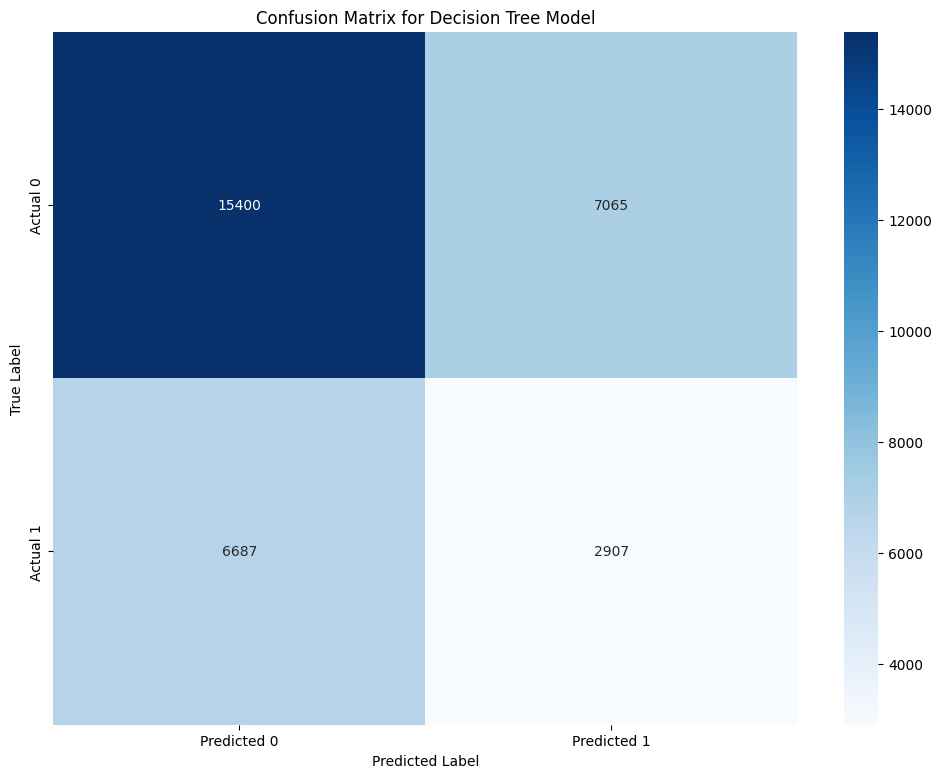

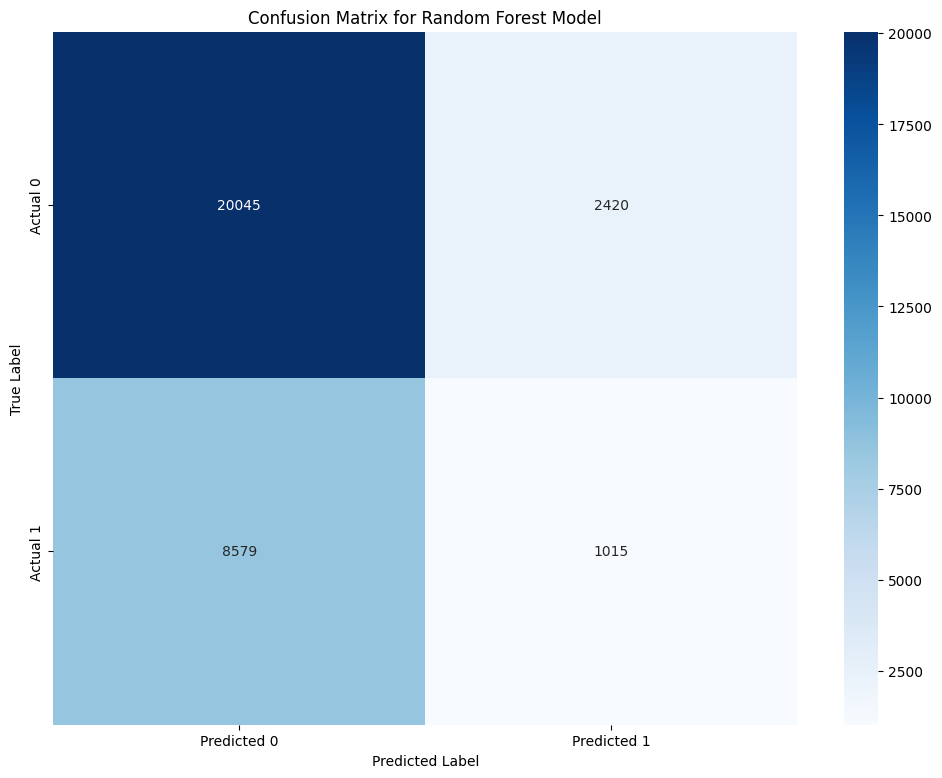

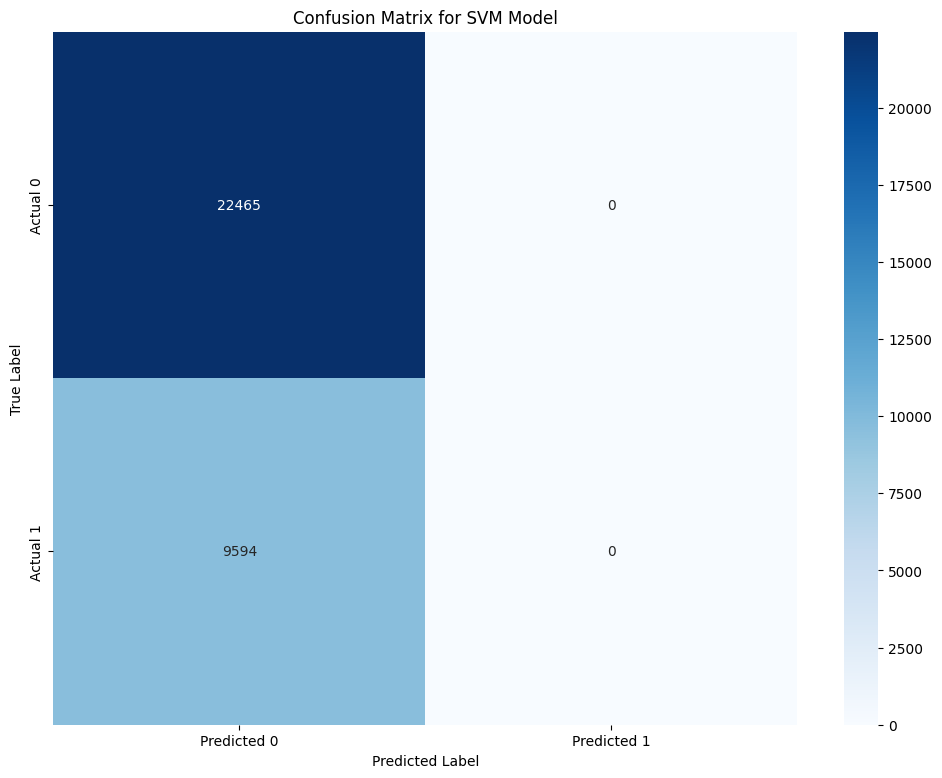

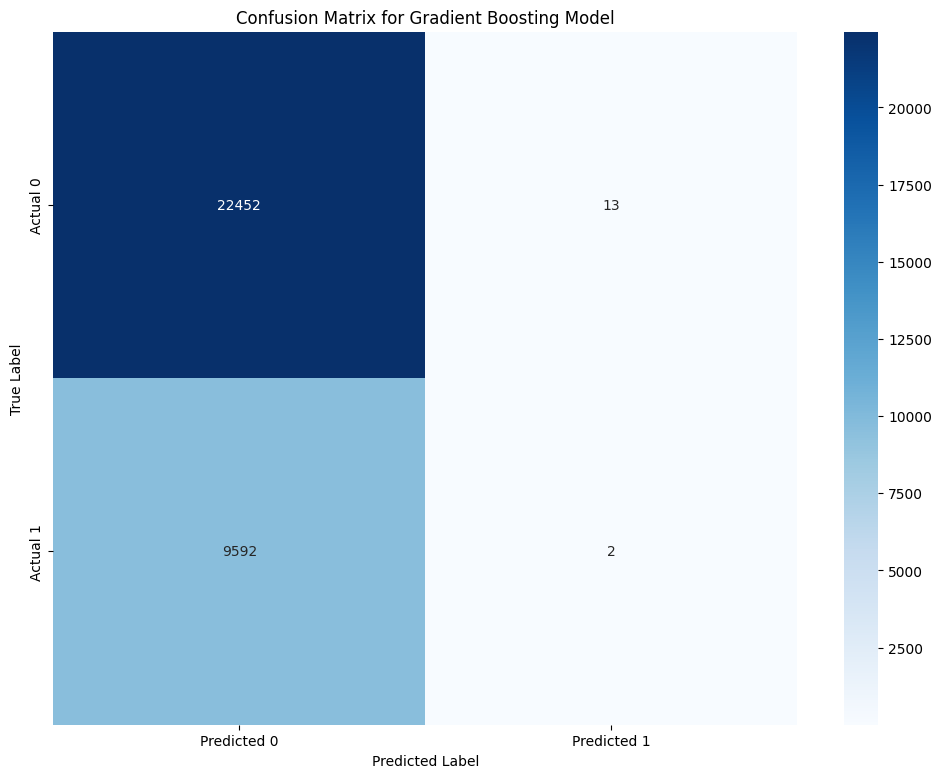

In [58]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 9))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [59]:
# Create a dictionary to store model performance metrics
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy

# Find the best model based on accuracy
best_model = max(model_scores, key=model_scores.get)
best_accuracy = model_scores[best_model]

print(f"\nThe best performing model is: {best_model} with an accuracy of {best_accuracy:.4f}")



The best performing model is: Logistic Regression with an accuracy of 0.7007
